In [1]:
import numpy as np
import jwst
from jwst import datamodels

In [2]:
model=datamodels.open('/home/nmonnier/Data/JWST/Orion_bar/Stage_2/jw01288002001_0211f_00001_mirifushort_cal.fits')
data = model.data

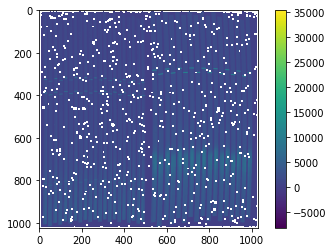

In [3]:
import matplotlib.pyplot as plt
data.shape
plt.figure()
plt.imshow(data)
plt.colorbar()

In [4]:
x_shape = data.shape[0]
y_shape = data.shape[1]

x_pixel_idx = np.arange(x_shape)
y_pixel_idx = np.arange(y_shape)

yy, xx = np.meshgrid(x_pixel_idx, y_pixel_idx)

detector2world = model.meta.wcs.get_transform('detector', 'world')

In [6]:
coordinates = detector2world(xx, yy)
test = detector2world(120,120)
binary_grid = np.zeros_like(data)
print(test)

(83.83641634758577, -5.421818669271549, 6.665647838597957)


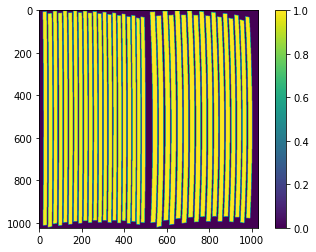

In [7]:
binary_grid[~np.isnan(coordinates[0].T)] = 1
plt.figure()
plt.imshow(binary_grid)
plt.colorbar()

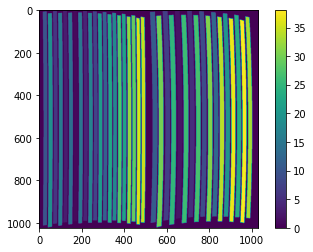

In [9]:
from skimage.measure import label

# Label connected components: Identify and label the white regions
label_image = label(binary_grid)
plt.imshow(label_image)
plt.colorbar()
plt.show()

In [10]:
pixel_set = np.where(label_image==10)

list_alpha = []
list_beta = []
list_lam = []
alpha, beta, lam = detector2world(pixel_set[1],pixel_set[0])

17912
[83.83637375 83.83639112 83.83640848 ... 83.83626104 83.83627833
 83.83629562]
83.83638136778889
0.0003124972928958414


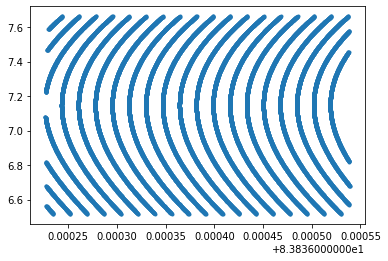

In [11]:
print(len(np.unique(lam)))
sorted_lam = np.sort(lam)
print(alpha)
print(np.mean(alpha))
print(np.max(alpha)-np.min(alpha))
plt.plot(alpha, lam, '.')

In [13]:
%matplotlib
intensity = data[pixel_set]
sc = plt.scatter(alpha, lam, c=intensity)
plt.colorbar(sc)
plt.show()
world2detector = model.meta.wcs.get_transform('world', 'detector')
world2detector(alpha[0], beta[0], lam[0])
print(f'Min alpha is {np.min(alpha)}, Max alpha is {np.max(alpha)}')

Using matplotlib backend: TkAgg
Min alpha is 83.83622662239941, Max alpha is 83.8365391196923


In [14]:
model.meta.wcsinfo

In [9]:
# Extract coordinates for each label
set_1 = np.where(label_image==1)
set_3 = np.where(label_image==3)

plt.figure()
for slit in range(len(np.unique(label_image))):
    print(f"Idx = {slit}")
    if slit == 0:
        continue
    pixel_set = np.where(label_image==slit)
    alpha, beta, lam = detector2world(pixel_set[1][slit],pixel_set[0][slit])
    if lam > 9:
        continue

    list_alpha = []
    list_beta = []
    for idx in range(len(set_1[0])):
        alpha, beta, lam = detector2world(pixel_set[1][idx],pixel_set[0][idx])
        list_alpha.append(alpha)
        list_beta.append(beta)

    plt.plot(list_alpha, list_beta, '.')


Idx = 0


<Figure size 432x288 with 0 Axes>